In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

In [2]:
#implicit midpoint method(2nd order) for coupled first order linear differential equation - Harmonic Oscillator

y1,y0,x1,x0,v1,v0,k,h = sp.symbols("y_{n+1} y_n x_{n+1} x_n v_{n+1} v_n k h")

def f(y1,y0):
    return (y1+y0)/2

def dxdt_RHS():
    dxdt0=v0
    dxdt1=v1
    return (dxdt0,dxdt1)

def dvdt_RHS():
    dvdt0=-k*x0
    dvdt1=-k*x1
    return dvdt0,dvdt1

def fx():
    return (-v1 + v0 + h*f(dvdt_RHS()[0],dvdt_RHS()[1]))
def fv():
    return (-x1 + x0 + h*f(dxdt_RHS()[0],dxdt_RHS()[1]))

x_eq = sp.linsolve([fx(),fv()],(x1,v1)).args[0][0]
v_eq = sp.linsolve([fx(),fv()],(x1,v1)).args[0][1]
xn = lambdify([x0,v0,h,k],x_eq)
vn = lambdify([x0,v0,h,k],v_eq)

In [3]:
#Explicit RK2 method

def RHS(x,v):
    xdot=v
    vdot=-k*x
    return (xdot,vdot)

def RK2(x,v,h):
    k1x, k1v = RHS(x,v)
    k2x, k2v = RHS(x+h/2*k1x, v+h/2*k1v)
    xn = x + h*k2x
    vn = v + h*k2v
    return xn, vn

In [4]:
h = 0.25  # step size
t = np.arange(0,30,h) # (initial time, final time + 1, time step size)
x_e = np.zeros(len(t))
v_e = np.zeros(len(t))
x = np.zeros(len(t))
v = np.zeros(len(t))
x[0] = 1 # initial position x(t)=x(0)=1
v[0] = 0 # initial velocity
x_e[0] = 1 # initial position x(t)=x(0)=1
v_e[0] = 0 # initial velocity
k = 1 #spring constant

for i in range (len(t)-1):
    x_e[i+1],v_e[i+1] = RK2(x_e[i],v_e[i],h)
    x[i+1] = xn(x[i],v[i],h,k)
    v[i+1] = vn(x[i],v[i],h,k)

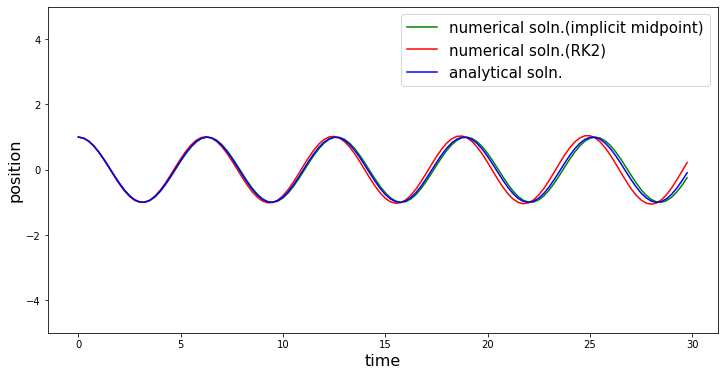

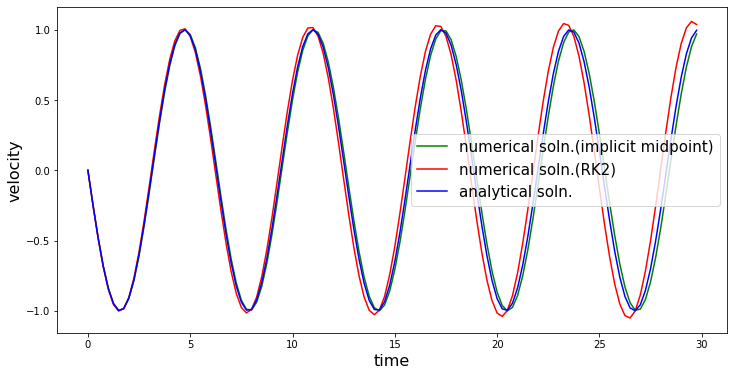

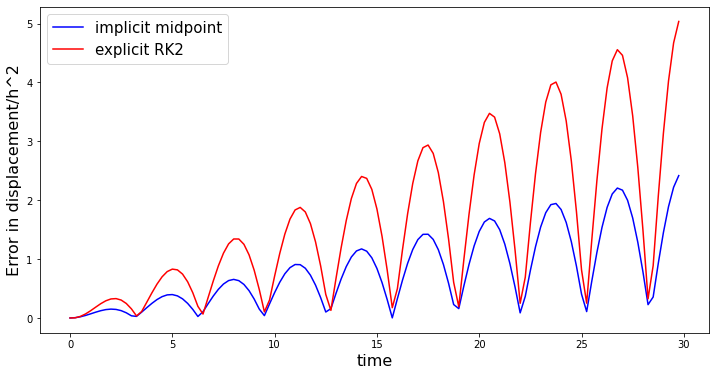

In [5]:
# Analytic solution: x = A*cos(w*t) + B*sin(w*t)
# with inital conditions x(t)=x(0)=1 and v(t)=v(0)=0:
A = 1 
B = 0
w = np.sqrt(k) # angular velocity

# Calculating analytical solution for array of time - t:
x_a = A*np.cos(w*t) + B*np.sin(w*t)
v_a = -A*np.sin(w*t) + B*np.cos(w*t)

#plot numerical and analytical solutions - position/displacement:
plt.figure(figsize=(12,6))
plt.ylim(-5,5)
plt.xlabel("time",fontsize=16)
plt.ylabel("position",fontsize=16)
plt.plot(t,x,color ='green')
plt.plot(t,x_e,color ='red')
plt.plot(t,x_a,color ='blue')
plt.legend(["numerical soln.(implicit midpoint)","numerical soln.(RK2)","analytical soln."],fontsize=15)
plt.show()

#plot numerical and analytical solutions - velocity:
plt.figure(figsize=(12,6))
plt.xlabel("time",fontsize=16)
plt.ylabel("velocity",fontsize=16)
plt.plot(t,v,color ='green')
plt.plot(t,v_e,color ='red')
plt.plot(t,v_a,color ='blue')
plt.legend(["numerical soln.(implicit midpoint)","numerical soln.(RK2)","analytical soln."],fontsize=15)
plt.show()

#Error calculation:
delX = np.abs((x - x_a)/h**2)
delX_e = np.abs((x_e - x_a)/h**2)

plt.figure(figsize=(12,6))
plt.xlabel("time",fontsize=16)
plt.ylabel("Error in displacement/h^2",fontsize=16)
plt.plot(t,delX,color ='blue')
plt.plot(t,delX_e,color ='red')
plt.legend(["implicit midpoint","explicit RK2"],fontsize=15)
plt.show()